In [5]:
# Step 1: Install the datasets library if not already installed
!pip install datasets --quiet

# Step 2: Import the library
from datasets import load_dataset

# Step 3: Load the dataset
dataset = load_dataset("fka/awesome-chatgpt-prompts")

# Step 4: Explore the dataset
print("✅ Available Splits:", dataset.keys())
print("\n📄 Sample Record:\n")
print(dataset['train'][0])  # show the first example



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\navee\.cache\huggingface\hub\datasets--fka--awesome-chatgpt-prompts. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_

✅ Available Splits: dict_keys(['train'])

📄 Sample Record:

{'act': 'An Ethereum Developer', 'prompt': 'Imagine you are an experienced Ethereum developer tasked with creating a smart contract for a blockchain messenger. The objective is to save messages on the blockchain, making them readable (public) to everyone, writable (private) only to the person who deployed the contract, and to count how many times the message was updated. Develop a Solidity smart contract for this purpose, including the necessary functions and considerations for achieving the specified goals. Please provide the code and any relevant explanations to ensure a clear understanding of the implementation.'}


In [6]:
from datasets import load_dataset
import nltk
from nltk.tokenize import word_tokenize
import string

# Download tokenizer
nltk.download('punkt')

# Load dataset
dataset = load_dataset("fka/awesome-chatgpt-prompts")
data = dataset['train']  # Use the 'train' split

# Extract the "prompt" field as corpus
corpus = [entry['prompt'] for entry in data if entry['prompt']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import string

# ✅ Download the tokenizer data
nltk.download('punkt')
nltk.download('punkt_tab')

# Sample sentence
text = "I want you to act as a Linux terminal."

# Clean and tokenize
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return word_tokenize(text)

tokens = preprocess(text)
print("🔹 Tokens:", tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...


🔹 Tokens: ['i', 'want', 'you', 'to', 'act', 'as', 'a', 'linux', 'terminal']


[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [13]:
from nltk.util import ngrams
from collections import Counter

# Preprocess and tokenize all texts in corpus
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return word_tokenize(text)

all_tokens = []
for sent in corpus:
    all_tokens.extend(preprocess(sent))

# Generate n-grams
def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Unigrams
unigrams = get_ngrams(all_tokens, 1)
print("\n🔹 Top 10 Unigrams:", Counter(unigrams).most_common(10))

# Bigrams
bigrams = get_ngrams(all_tokens, 2)
print("\n🔹 Top 10 Bigrams:", Counter(bigrams).most_common(10))

# Trigrams
trigrams = get_ngrams(all_tokens, 3)
print("\n🔹 Top 10 Trigrams:", Counter(trigrams).most_common(10))



🔹 Top 10 Unigrams: [(('to',), 617), (('the',), 578), (('you',), 577), (('and',), 569), (('i',), 512), (('a',), 433), (('will',), 290), (('of',), 243), (('as',), 242), (('want',), 228)]

🔹 Top 10 Bigrams: [(('i', 'want'), 221), (('you', 'to'), 215), (('want', 'you'), 203), (('act', 'as'), 170), (('to', 'act'), 166), (('as', 'a'), 134), (('my', 'first'), 134), (('i', 'will'), 131), (('you', 'will'), 116), (('request', 'is'), 91)]

🔹 Top 10 Trigrams: [(('want', 'you', 'to'), 201), (('i', 'want', 'you'), 199), (('you', 'to', 'act'), 164), (('to', 'act', 'as'), 160), (('act', 'as', 'a'), 130), (('request', 'is', 'i'), 77), (('my', 'first', 'request'), 59), (('first', 'request', 'is'), 58), (('and', 'you', 'will'), 54), (('is', 'i', 'need'), 52)]


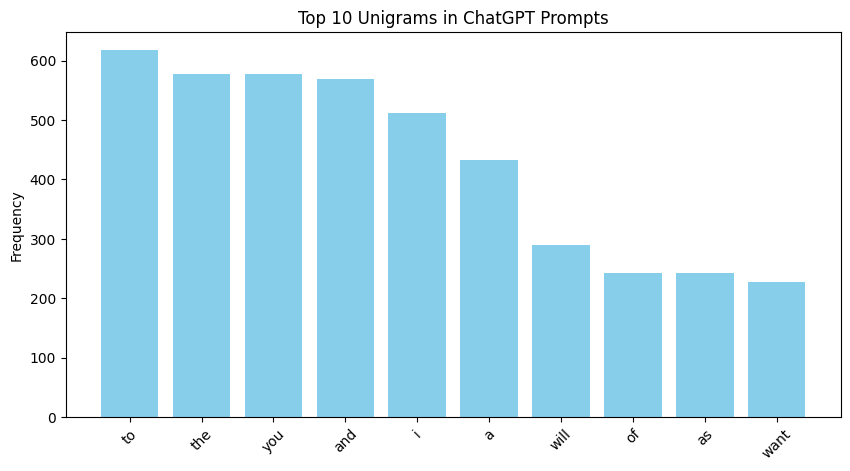

In [14]:
import matplotlib.pyplot as plt

# Top 10 unigrams
unigram_counts = Counter(unigrams).most_common(10)
words = [' '.join(w) for w, _ in unigram_counts]
counts = [c for _, c in unigram_counts]

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Unigrams in ChatGPT Prompts")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()


In [16]:
import pandas as pd

# Create DataFrames for each n-gram level
unigram_df = pd.DataFrame(Counter(unigrams).most_common(), columns=["ngram", "frequency"])
bigram_df = pd.DataFrame(Counter(bigrams).most_common(), columns=["ngram", "frequency"])
trigram_df = pd.DataFrame(Counter(trigrams).most_common(), columns=["ngram", "frequency"])

# Convert tuples to strings
unigram_df["ngram"] = unigram_df["ngram"].apply(lambda x: x[0])
bigram_df["ngram"] = bigram_df["ngram"].apply(lambda x: ' '.join(x))
trigram_df["ngram"] = trigram_df["ngram"].apply(lambda x: ' '.join(x))

# Add n-gram type label
unigram_df["type"] = "unigram"
bigram_df["type"] = "bigram"
trigram_df["type"] = "trigram"

# Combine all into one DataFrame
all_ngrams_df = pd.concat([unigram_df, bigram_df, trigram_df], ignore_index=True)

# Optional: Filter out low-frequency n-grams (e.g., frequency > 1)
filtered_ngrams_df = all_ngrams_df[all_ngrams_df["frequency"] > 1]

# Save to single CSV
filtered_ngrams_df.to_csv("all_ngrams.csv", index=False)

print("✅ Combined CSV saved as all_ngrams.csv with filtered frequencies.")


✅ Combined CSV saved as all_ngrams.csv with filtered frequencies.


# NLP Corpus Processing Summary

- Installed and imported necessary libraries: `datasets`, `nltk`, `matplotlib`, etc.
- Downloaded NLTK's `punkt` tokenizer model required for tokenizing sentences and words.
- Loaded the `fka/awesome-chatgpt-prompts` dataset from Hugging Face.
- Extracted the `prompt` field from the dataset to create a text corpus.
- Defined a preprocessing function to:
  - Convert text to lowercase.
  - Remove punctuation.
  - Tokenize text into individual words using NLTK's `word_tokenize`.
- Tokenized all prompts in the corpus and combined all tokens into a single list.
- Generated n-grams (unigrams, bigrams, and trigrams) from the token list.
- Calculated and displayed the top 10 most frequent n-grams for each n-gram type.
- Visualized the top 10 unigrams frequency using a bar chart.

This workflow prepares raw text data for further NLP analysis and modeling.
